In [ ]:
class K_Means():
    def __init__(self, k=2, max_iter=500):
        self.K = k
        
    def fit(self,X):
        self.X = X
        
        self.centroids = []
        # Initalizing the Centroids
        for k in range(self.X):
            self.centroids = self.X[k]
        
        

In [110]:
class K_Means:
    def __init__(self, k=2, max_iter=500):
        self.k = k 
        self.max_iter = max_iter
        
        
    def compute_wcss(self, each_data_point_distances):
        # to find te sum of squares of distances so that we can find the optimal cluster for this.
        wcss = np.sum(np.square(each_data_point_distances))
        return wcss

    def fit(self,data):

        self.centroids = {}
        self.inertia_ = 0   # Initialization of the WCSS(within cluster of sum of squares.)
        
        for k in range(self.k):
            # Initializing the centroids.
            self.centroids[k+1] = data[k]

        for i in range(self.max_iter):
            self.clusters = {}
            self.labels_=[]
            self.each_data_points_distances=[]

            for k in range(self.k):
                self.clusters[k+1] = []

            for data_points in data:
                distances = [np.sqrt(np.sum(np.square(data_points-centroid))) for centroid in self.centroids.values()]
                cluster = distances.index(min(distances))
                self.labels_.append(cluster+1)
                self.each_data_points_distances.append(distances)
                self.clusters[cluster+1].append(data_points)

            self.prev_centroids = dict(self.centroids)
            if i<self.max_iter-1:
                for cluster in self.clusters:
                    self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)
            
        self.labels_ = np.array(self.labels_)
        self.centroids = np.array(list(self.centroids.values()))
        
        self.inertia_ = self.compute_wcss(self.each_data_points_distances)
        
        return f"K_Means(k={self.k}, max_iter={self.max_iter})"

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from numpy.random import randint
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
 
#Loading the Data
iris= load_iris()
 
# Store features matrix in X
X= iris.data
#Store target vector in 
y= iris.target
 
 
#Creating the training Data
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [112]:
kmeans = K_Means(k=3)

In [113]:
kmeans.fit(X_train)

'K_Means(k=3, max_iter=500)'

In [114]:
kmeans.centroids

array([[5.90851064, 2.75531915, 4.38085106, 1.44680851],
       [5.02      , 3.4425    , 1.465     , 0.25      ],
       [6.84545455, 3.07575758, 5.73333333, 2.06666667]])

In [115]:
kmeans.prev_centroids

{1: array([5.90851064, 2.75531915, 4.38085106, 1.44680851]),
 2: array([5.02  , 3.4425, 1.465 , 0.25  ]),
 3: array([6.84545455, 3.07575758, 5.73333333, 2.06666667])}

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, kmeans.labels_)

0.25833333333333336

In [95]:
y_train

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [96]:
kmeans.labels_

array([0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 1])

In [63]:
kmeans.inertia_

3252.15973525753

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

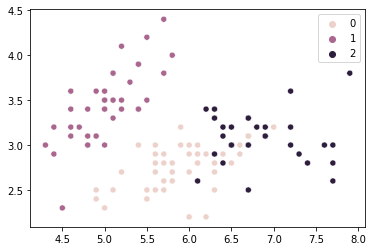

In [98]:
import seaborn as sns
sns.scatterplot(X_train[:,0], X_train[:, 1], hue= kmeans.labels_)


<AxesSubplot:>

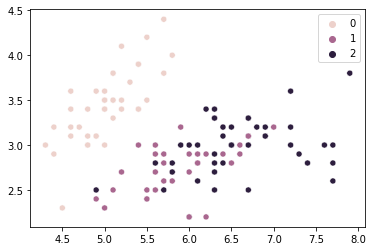

In [100]:
sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train)

In [101]:
y_labels = kmeans.labels_

In [102]:
for i in range(len(y_labels)):
    if y_labels[i]==0:
        y_labels[i]=1
    elif y_labels[i]==1:
        y_labels[i]=0

In [103]:
y_labels

array([1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 1, 1, 1, 0, 2, 0])

In [104]:
accuracy_score(y_labels, y_train)

0.8833333333333333

In [121]:
(np.square(X_train-X_train[0]))

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.600e-01, 0.000e+00, 9.000e-02, 0.000e+00],
       [3.600e-01, 1.000e-02, 1.440e+00, 9.000e-02],
       [6.400e-01, 1.000e-02, 2.500e-01, 1.210e+00],
       [9.000e-02, 1.600e-01, 1.600e-01, 3.600e-01],
       [4.000e+00, 9.000e-02, 1.024e+01, 1.210e+00],
       [1.000e-02, 1.600e-01, 1.210e+00, 6.400e-01],
       [9.000e-02, 9.000e-02, 1.210e+00, 1.000e+00],
       [1.210e+00, 9.000e-02, 5.290e+00, 1.000e+00],
       [9.000e-02, 4.000e-02, 2.500e-01, 1.000e+00],
       [2.560e+00, 2.500e-01, 9.000e+00, 8.100e-01],
       [2.560e+00, 3.600e-01, 9.000e+00, 4.900e-01],
       [1.960e+00, 4.000e-02, 4.900e-01, 1.000e-02],
       [4.410e+00, 3.600e-01, 1.089e+01, 1.000e+00],
       [9.000e-02, 1.600e-01, 1.000e-02, 9.000e-02],
       [1.960e+00, 1.440e+00, 9.610e+00, 1.440e+00],
       [9.000e-02, 4.000e-02, 9.000e-02, 4.000e-02],
       [4.900e-01, 9.000e-02, 4.000e-02, 2.500e-01],
       [1.000e+00, 1.000e-02, 9.000e-02, 4.900

In [120]:
np.square(X_train[1]-X_train[0])

array([0.16, 0.  , 0.09, 0.  ])